<a href="https://colab.research.google.com/github/williamvalenciaK/PowerBiPIT/blob/main/Clases/Visualizaciones02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<table border=1 width='99%'>
<tr>
<td bgcolor='#004261'>

# **<font color="#FFFFFF">  🗹  MÓDULO 02.- Visualizaciones básicas</font>**

</td>
</tr>
</table>

<table width='99%'>
<tr>
<td bgcolor='#FFC901'>

## **<font color="#000000"> ◉ ToolTip de cantidades vendidas</font>**

</td>
</tr>
</table>

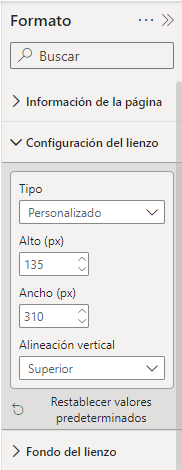

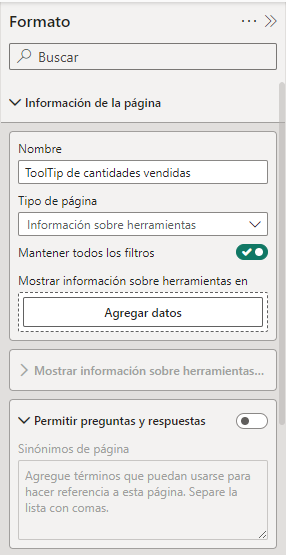

<table width='99%'>
<tr>
<td bgcolor='#FFC901'>

## **<font color="#000000"> ◉ Mapa de cantidad de ventas por continente</font>**

</td>
</tr>
</table>

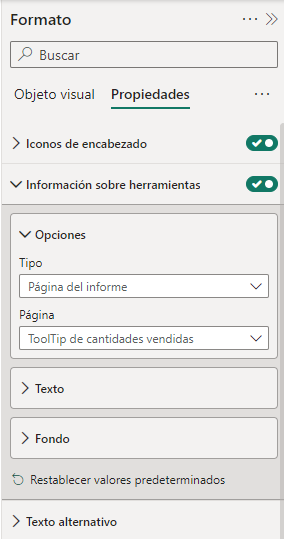

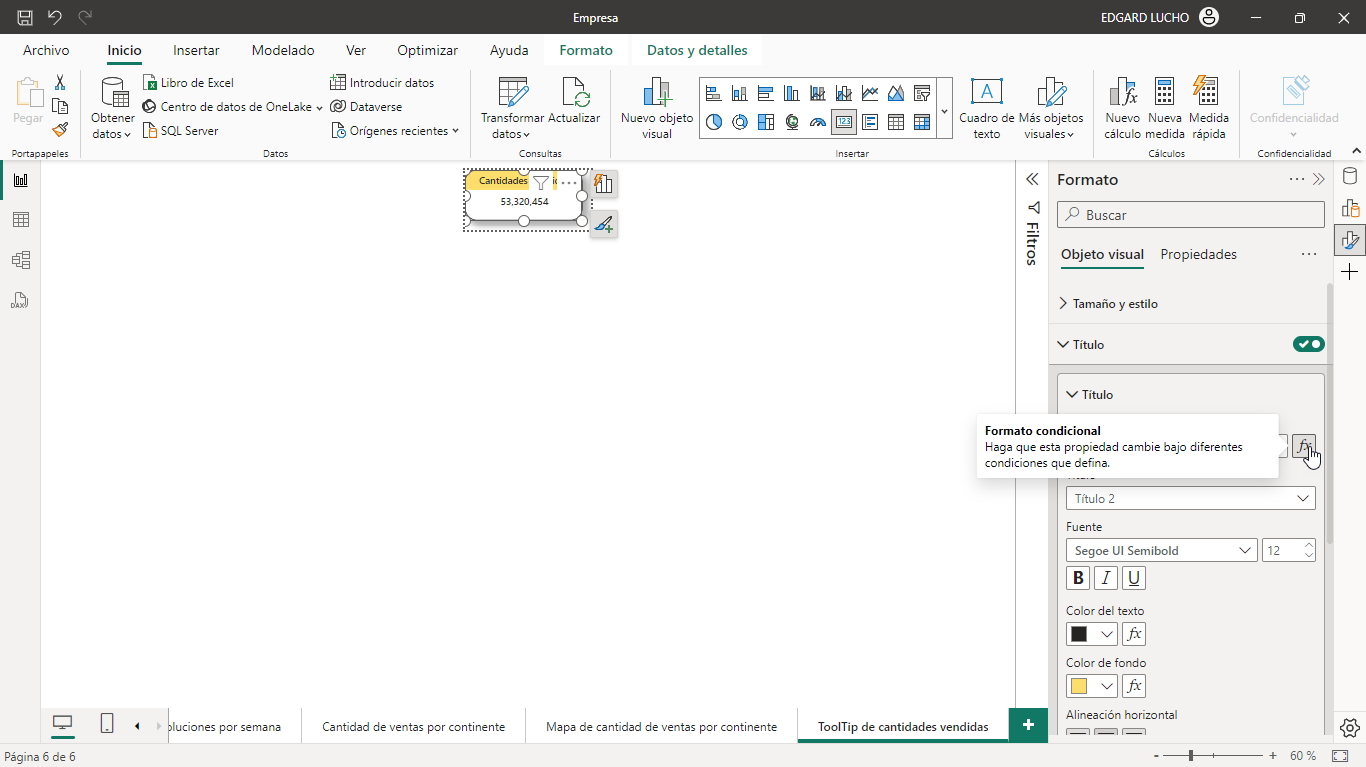

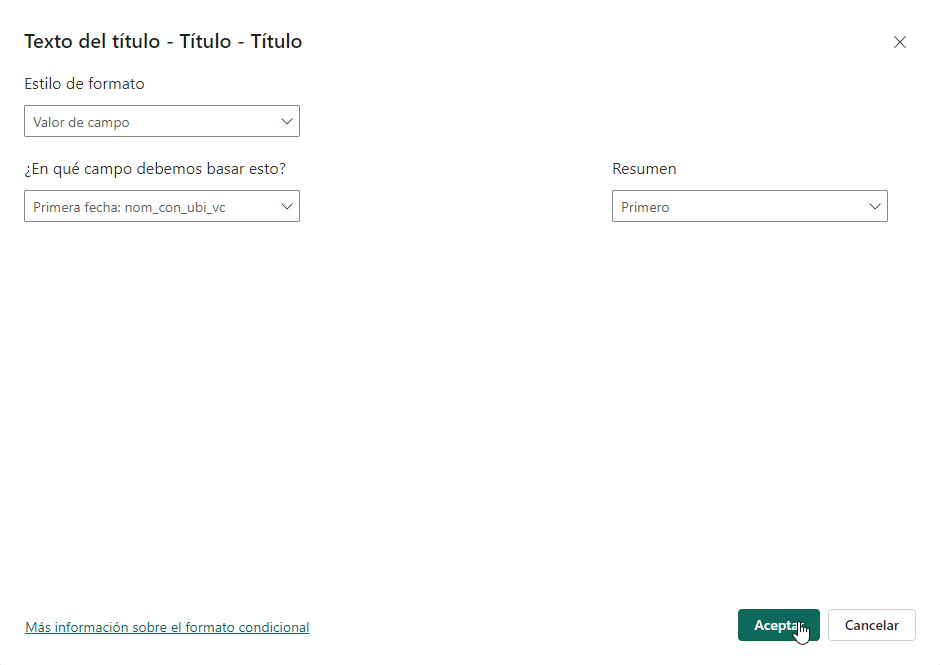



```
Ventas = SUMX
(
    Factura,
    (Factura[cnt_ven_fac_in]-Factura[cnt_ret_fac_in]-Factura[cnt_des_fac_in])
    *
    RELATED(Producto[pre_ven_prd_mo])
    *
    (
        1 -
        IF
        (
                Factura[cnt_des_fac_in]=0
            &&
                Factura[fec_fac_dt]>=RELATED('Promoción'[fec_ini_pro_dt])
            &&
                Factura[fec_fac_dt]<=RELATED('Promoción'[fec_fin_pro_dt]),
            RELATED('Promoción'[por_des_pro_de]),
            0
        )
    )
)
```





```
Costos = SUMX
(
    Factura,
    Factura[cnt_ven_fac_in]*Factura[pre_cos_fac_mo]
)
```





```
Utilidad = [Ventas]-[Costos]
```





```
Margen 50% = 0.5*[Utilidad]
```





```
Margen 25% = 0.25*[Utilidad]
```



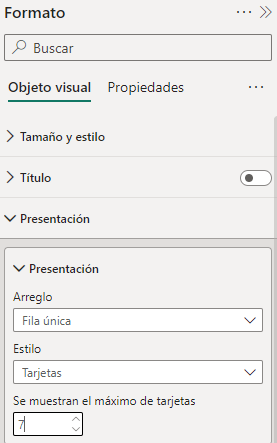

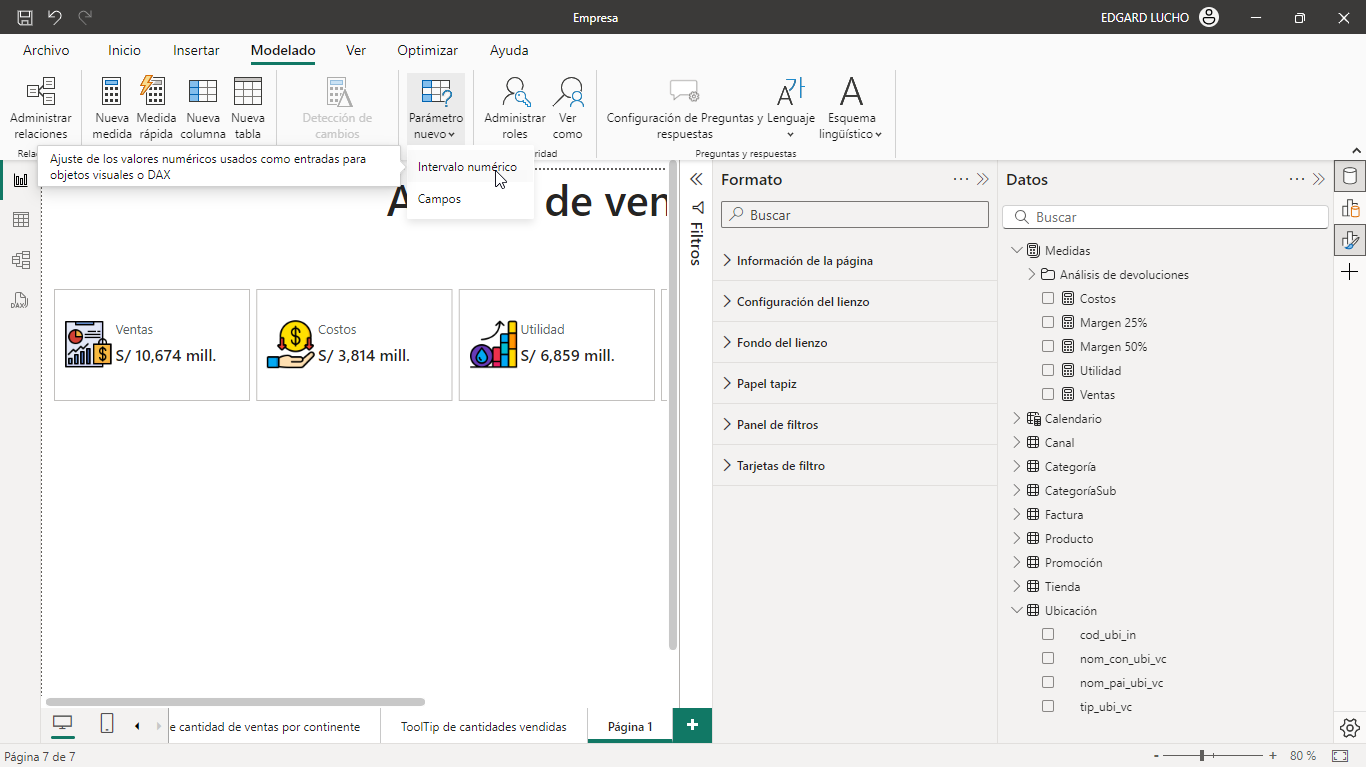

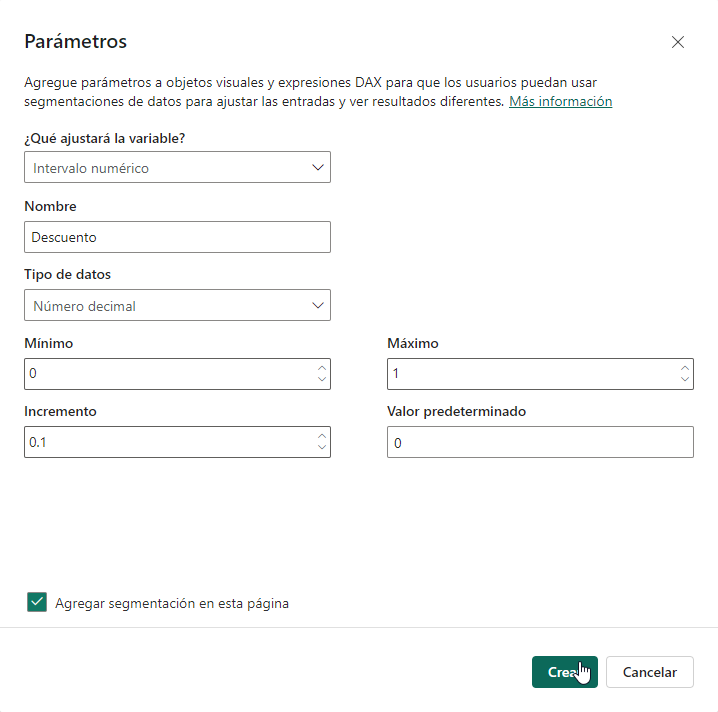

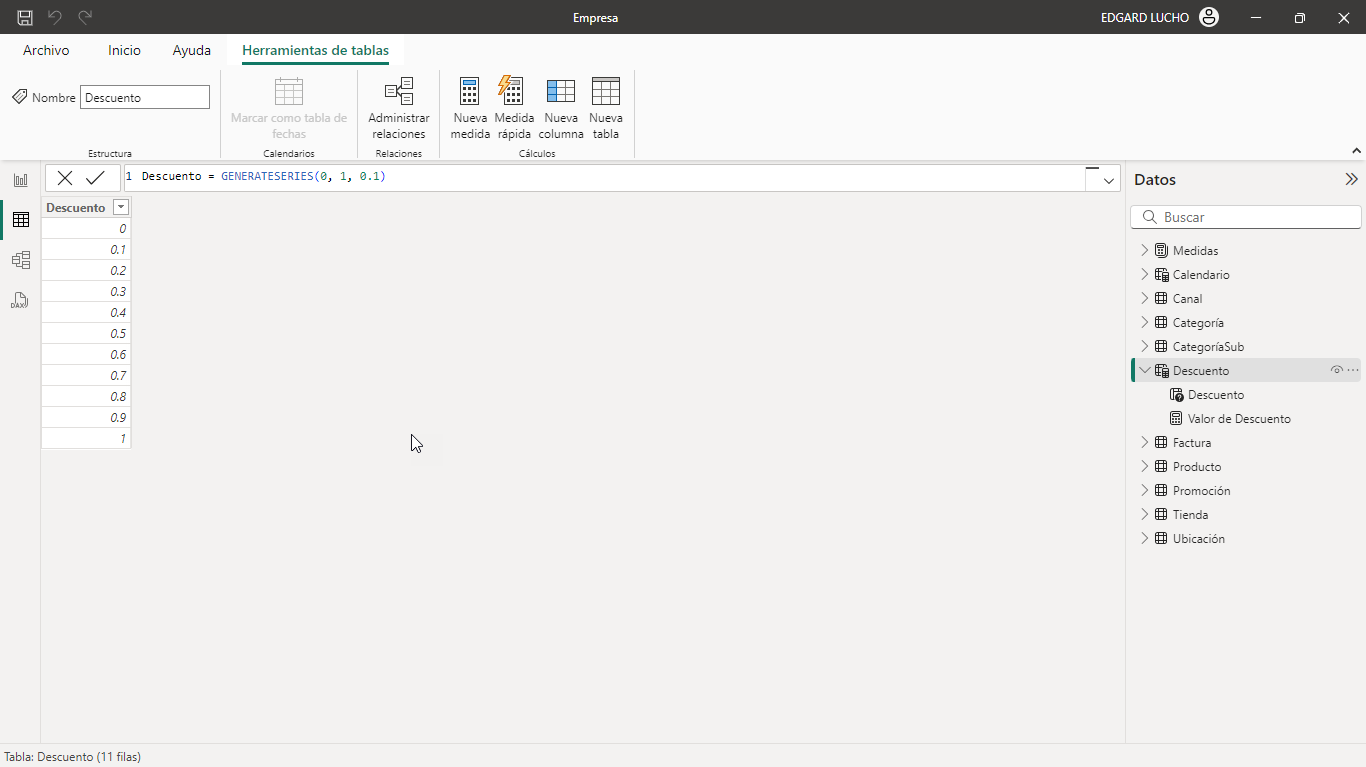



```
Ventas con descuento = [Ventas]*(1-Descuento[Valor de Descuento])
```





```
Margen con descuento = [Ventas con descuento]-[Costos]
```



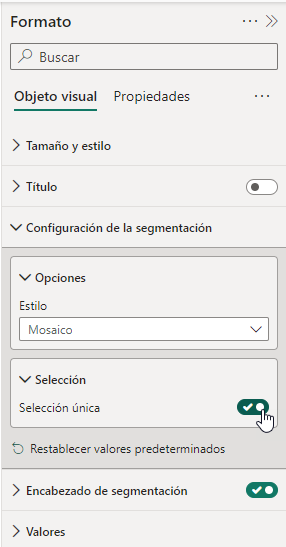

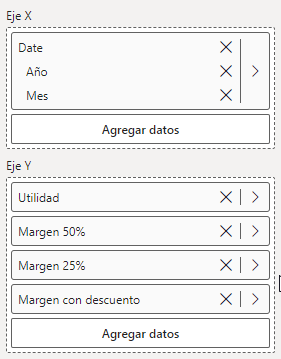

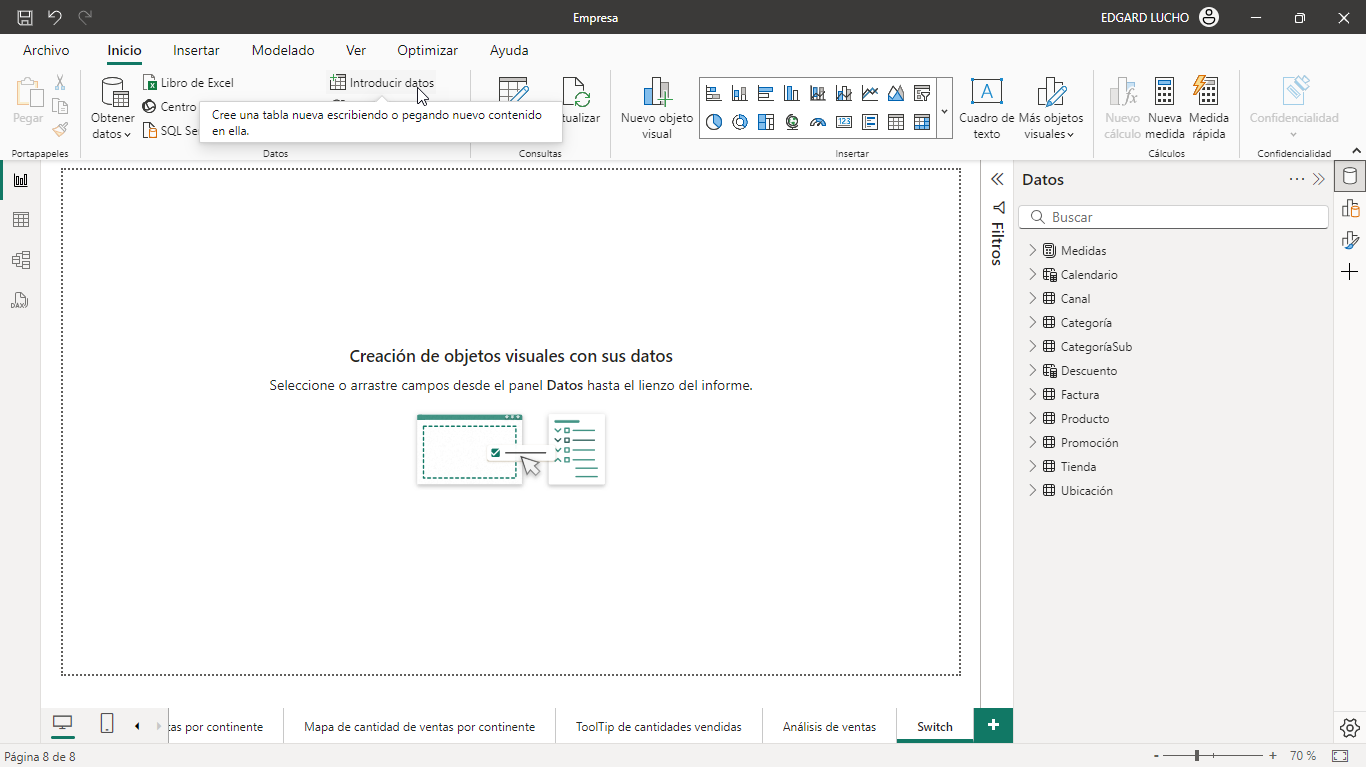

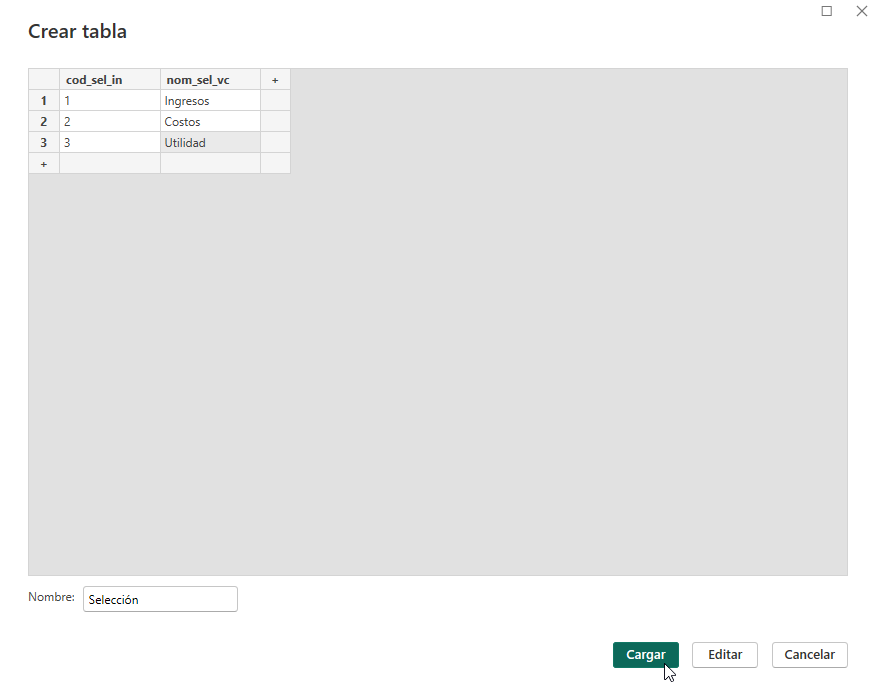



```
Total =
SWITCH
(
    TRUE(),
    VALUES('Selección'[nom_sel_vc]) = "Ingresos", [Ventas],
    VALUES('Selección'[nom_sel_vc]) = "Costos", [Costos],
    VALUES('Selección'[nom_sel_vc]) = "Utilidad", [Utilidad],
    [Ventas]
)
```

